In [1]:
# Import the FEMSystem Class from directory above
import sys
sys.path.append('..')
from FEMSystem import FEMSystem

import jax.numpy as jnp
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
separations = np.arange(1,21,3)

ratios = []

for sep in separations:
    with open(f"./allplots/sweep1/Separation {sep}/results.pkl", 'rb') as f:
        pickled_obj= pickle.load(f)
        print("Pickled object loaded",sep)
        E_J,E_C,e_0 = pickled_obj["E_J"],pickled_obj["E_C"],pickled_obj["e0"]
        ratios.append(E_J/E_C)

plt.plot(separations,ratios,".")

2026-01-26 17:41:40.567592: W external/xla/xla/tsl/framework/bfc_allocator.cc:482] Allocator (GPU_0_bfc) ran out of memory trying to allocate 18.42MiB (rounded to 19316224)requested by op 
2026-01-26 17:41:40.567756: W external/xla/xla/tsl/framework/bfc_allocator.cc:494] ************************************************************xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx*__


XlaRuntimeError: RESOURCE_EXHAUSTED: Out of memory while trying to allocate 19316088 bytes.

In [2]:
pickled_obj = {}

with open('./allplots/smoothtest/results.pkl', 'rb') as f:
    pickled_obj= pickle.load(f)

femsystem:FEMSystem = pickled_obj["femsystem"]
femsystem.saveFigsDir = None # Turn OFF saving plots
u_even,u_odd = pickled_obj["u_even"],pickled_obj["u_odd"]
u_even_interior,u_odd_interior = u_even[femsystem.interior_dofs],u_odd[femsystem.interior_dofs]
theta_at_dofs = pickled_obj["theta_at_dofs"]
theta_at_interior = theta_at_dofs[femsystem.interior_dofs]
n,coeffs = pickled_obj["n"],pickled_obj["coeffs"]
E_J,E_C,e_0 = pickled_obj["E_J"],pickled_obj["E_C"],pickled_obj["e0"]

print(f"EJ: {E_J}, EC: {E_C}, EJ/EC: {E_J/E_C}")

EJ: 0.19056320190429688, EC: 0.0013662736164405942, EJ/EC: 139.4766082763672


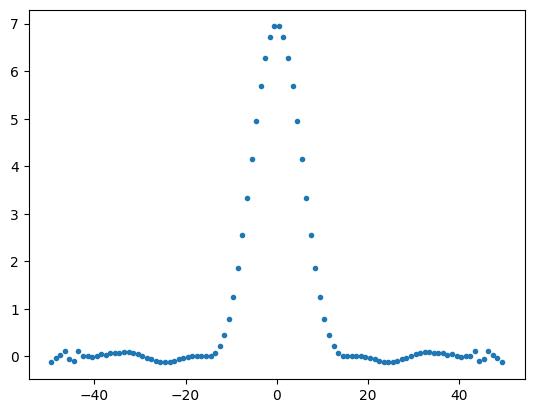

In [3]:
x = (n-1)/2 - jnp.arange(n)
plt.plot(x,coeffs,".")
# femsystem.plot_at_inteRior_2d(theta_at_dofs[femsystem.interior_dofs])
# femsystem.plot_at_interior_2d_in3d(u_odd_interior,plot_title="Odd Mode")
# femsystem.plot_at_interior_2d_in3d(u_even_interior,plot_title="Even Mode")

V min to max: -0.0057322225 0.0057322225


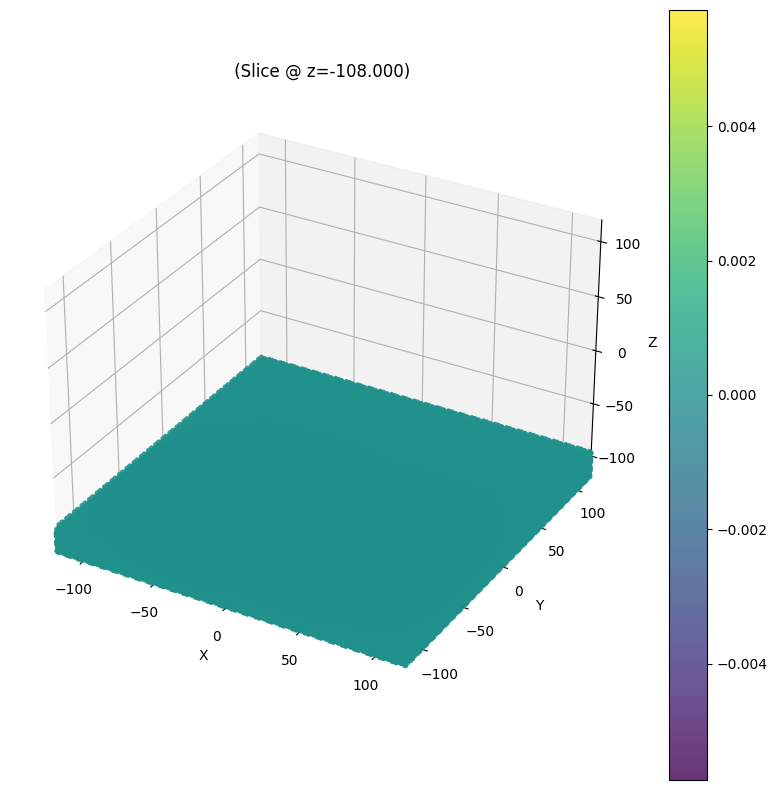

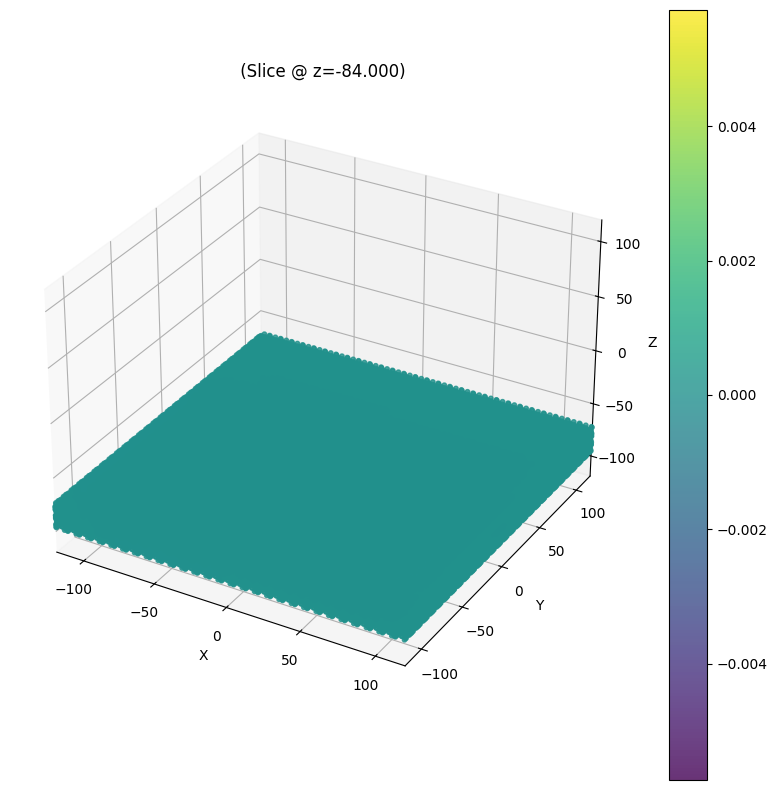

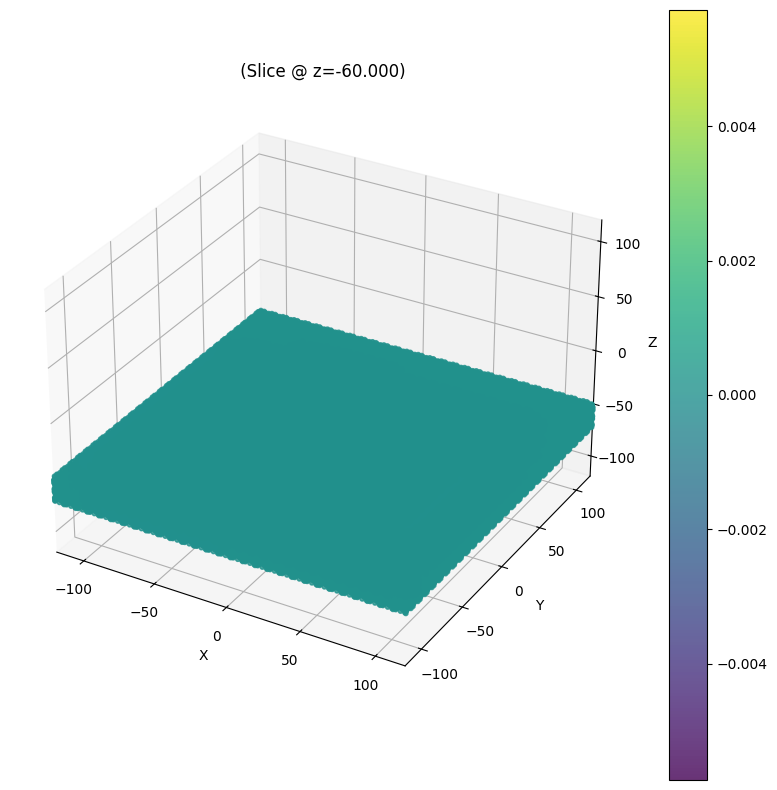

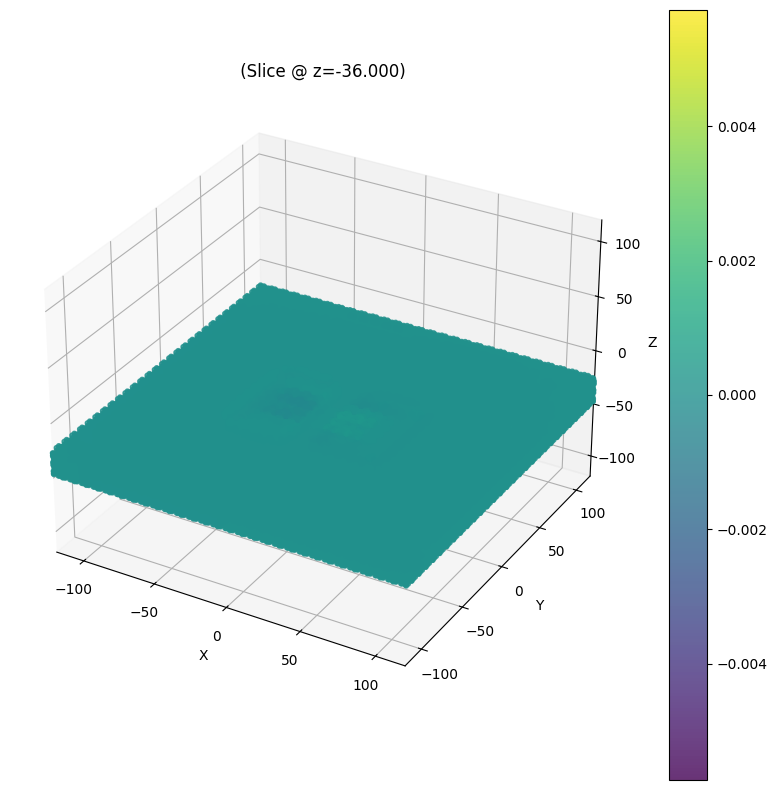

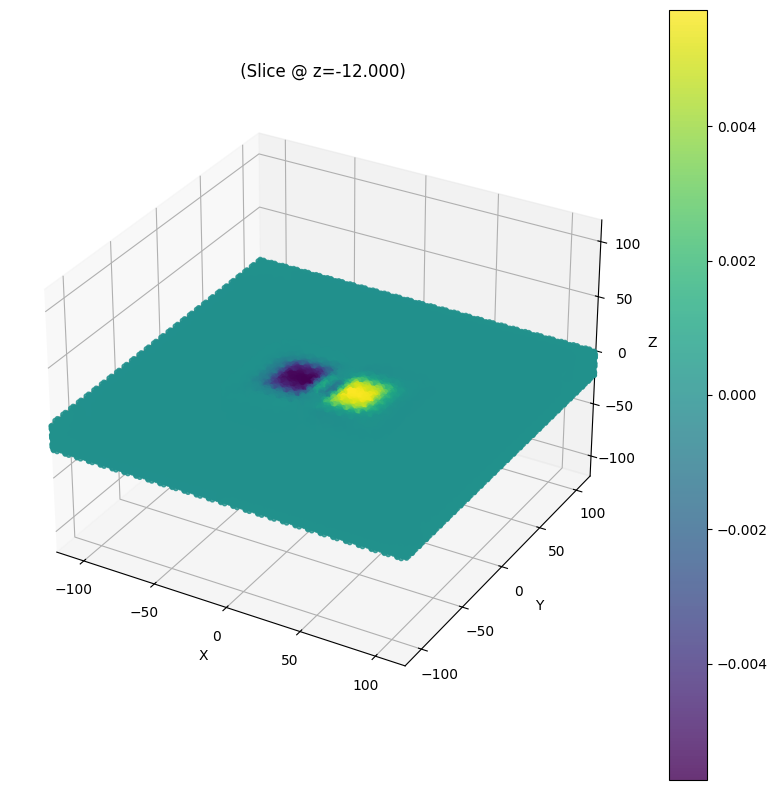

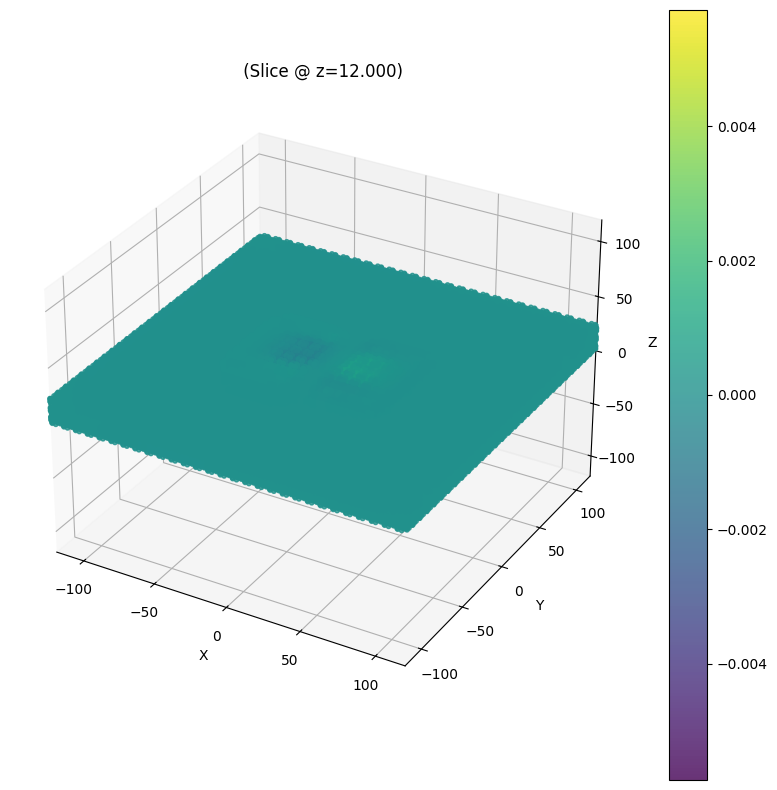

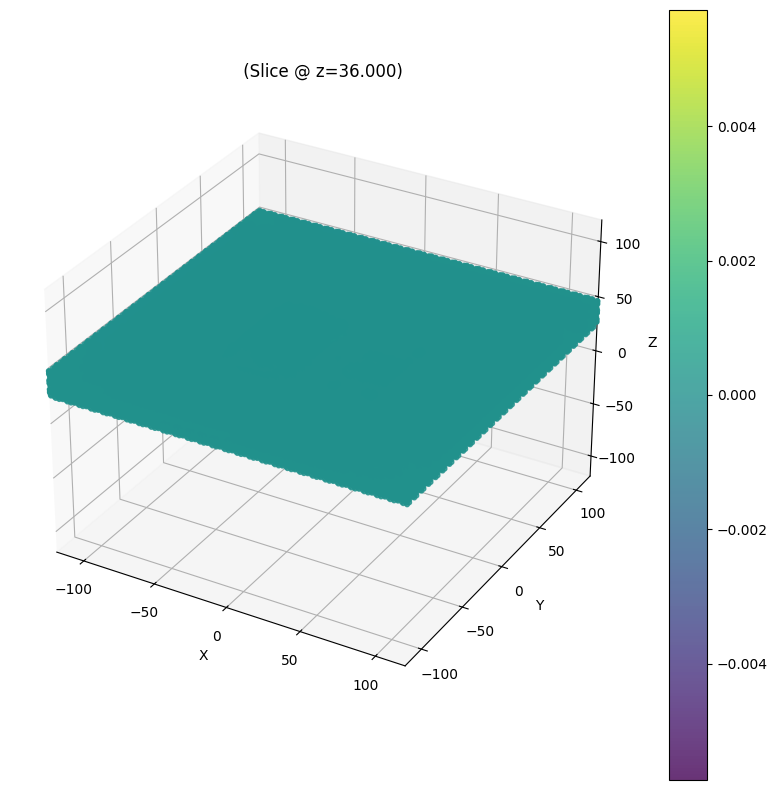

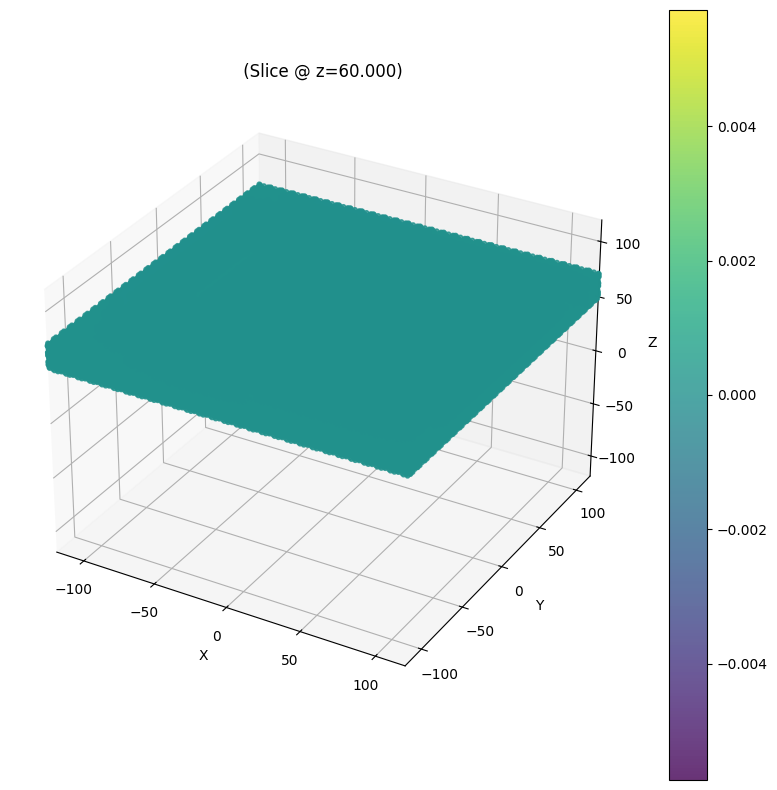

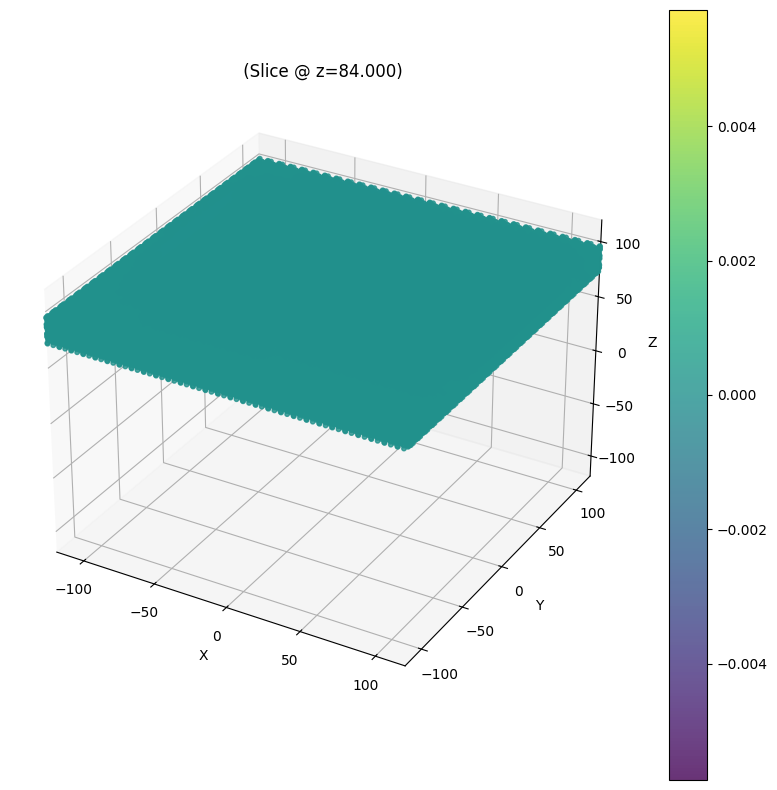

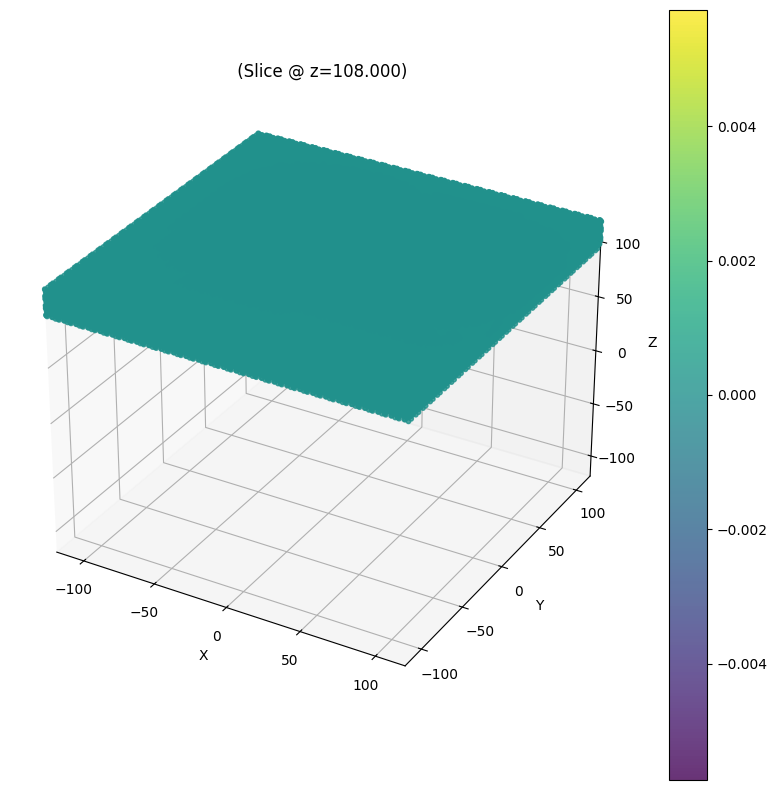

In [4]:
femsystem.plot_n_slices_interior(u_odd_interior,n_slices=10)

V min to max: -1.1554481e-05 0.0067858044


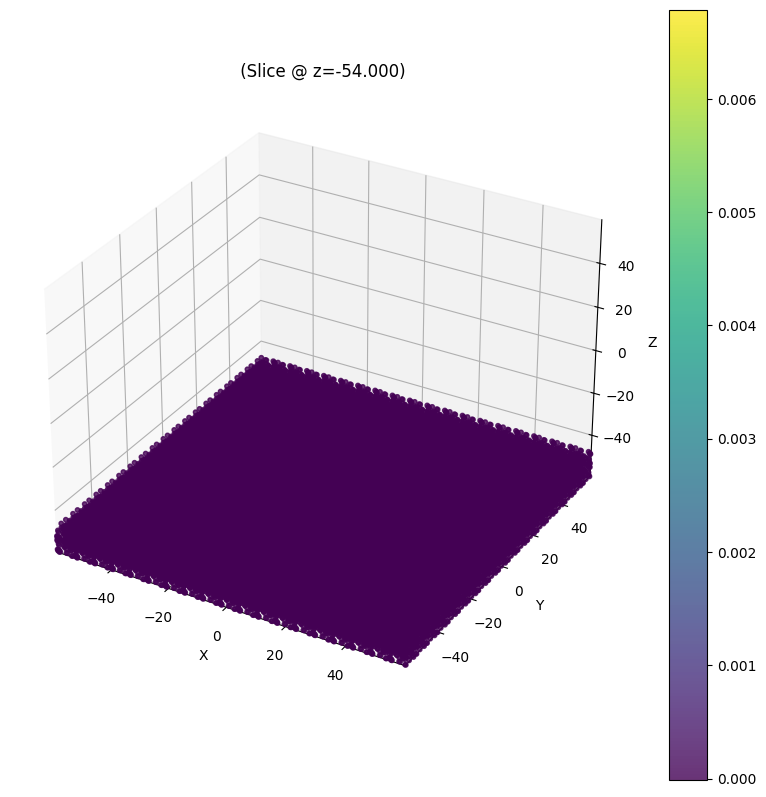

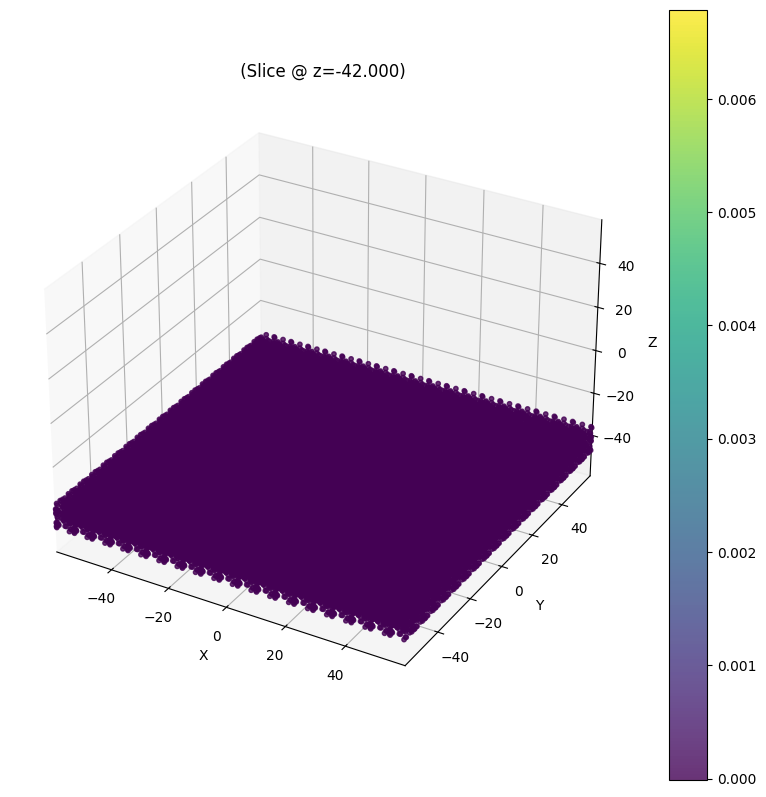

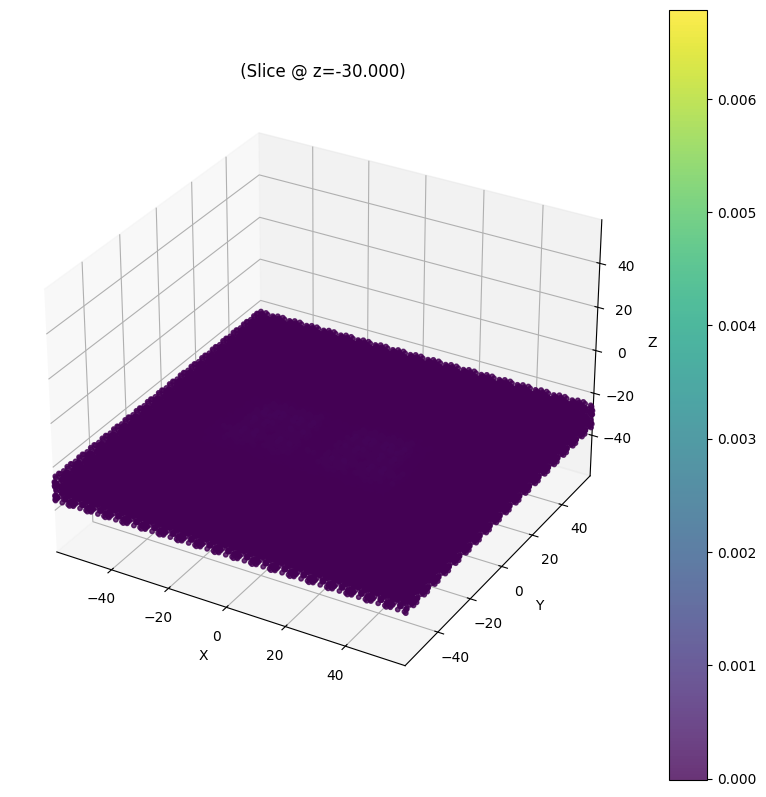

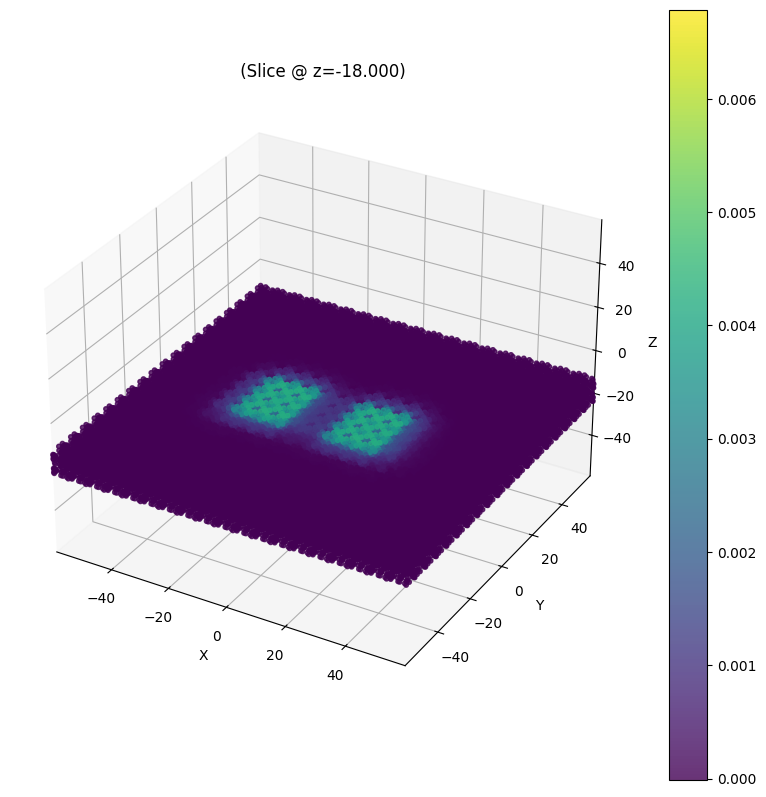

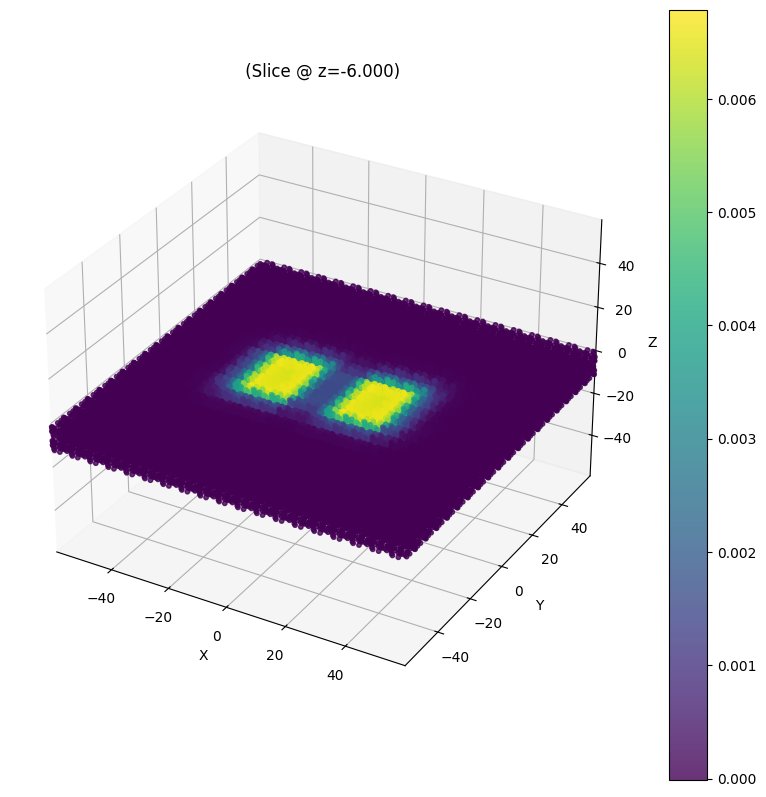

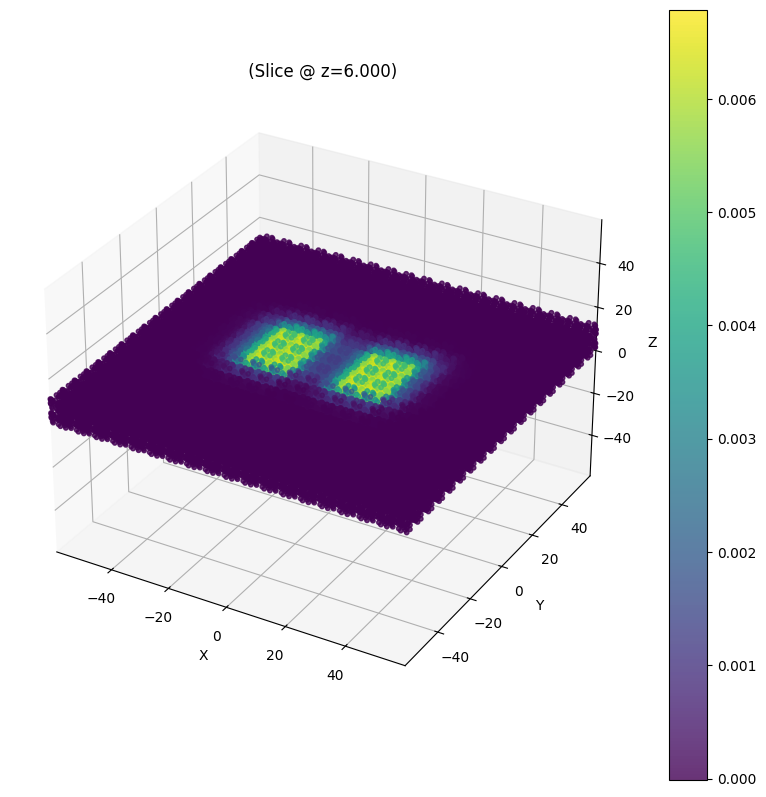

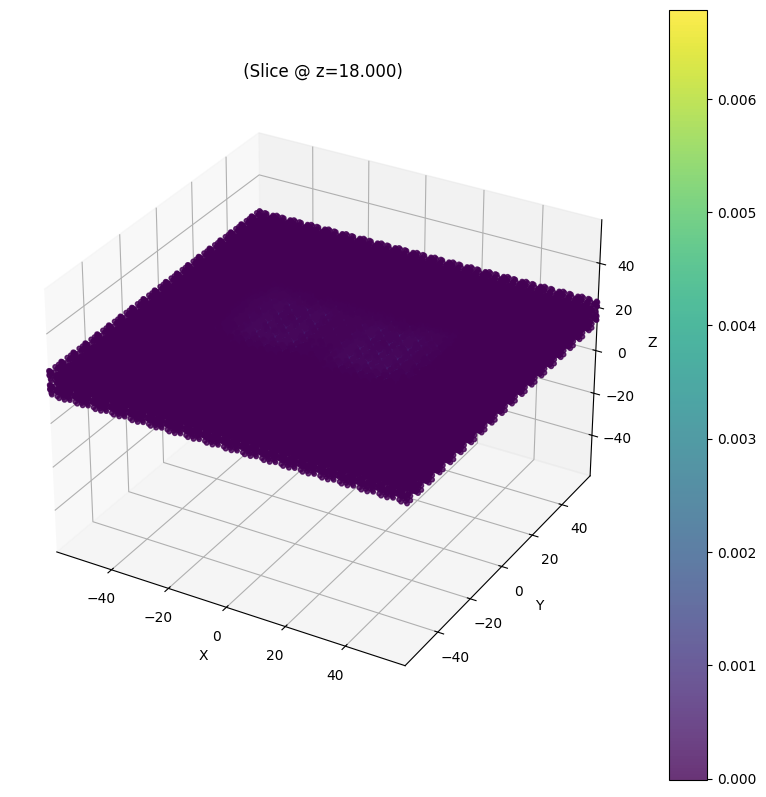

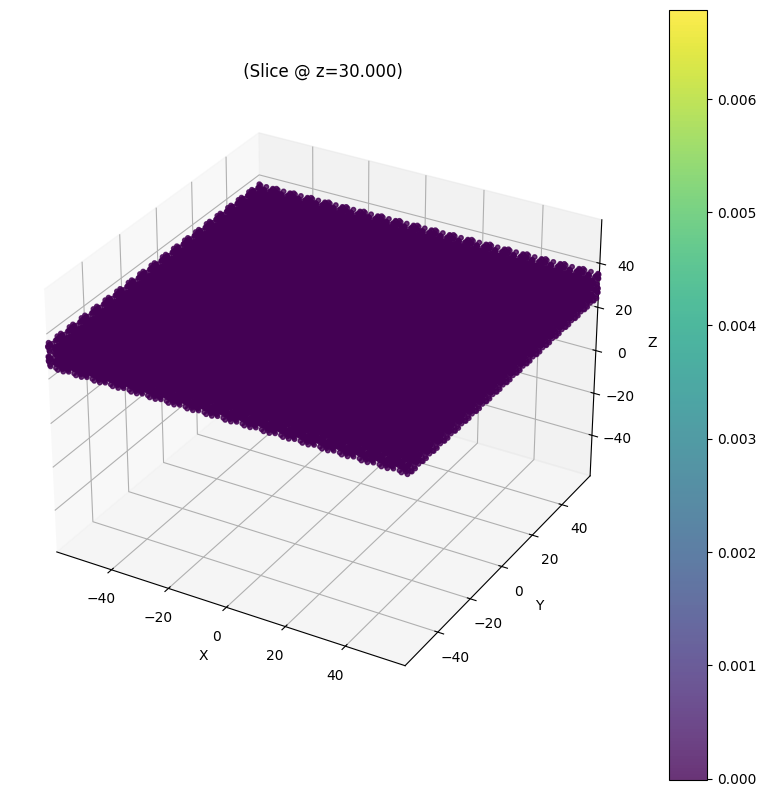

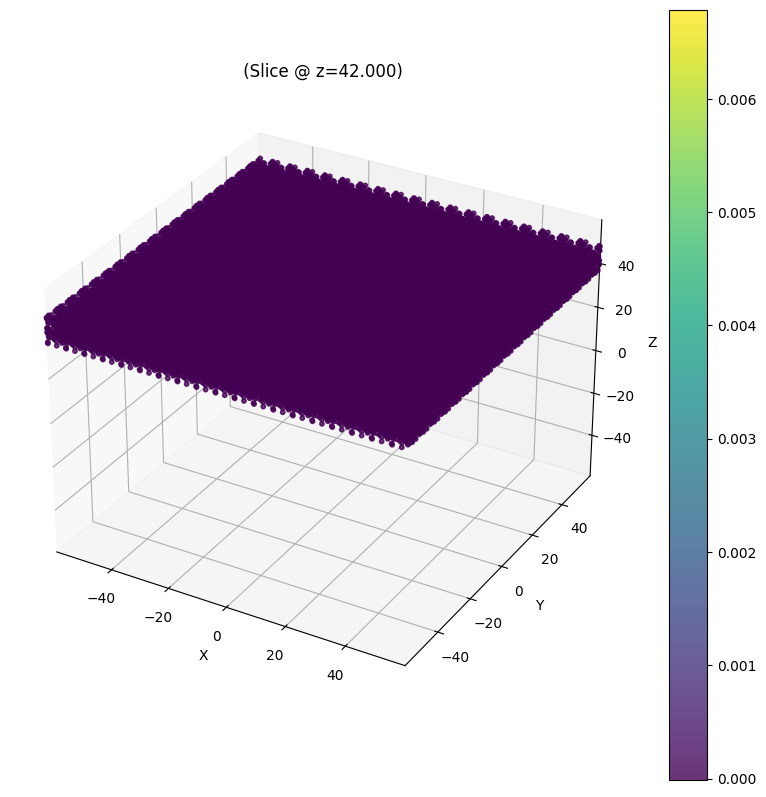

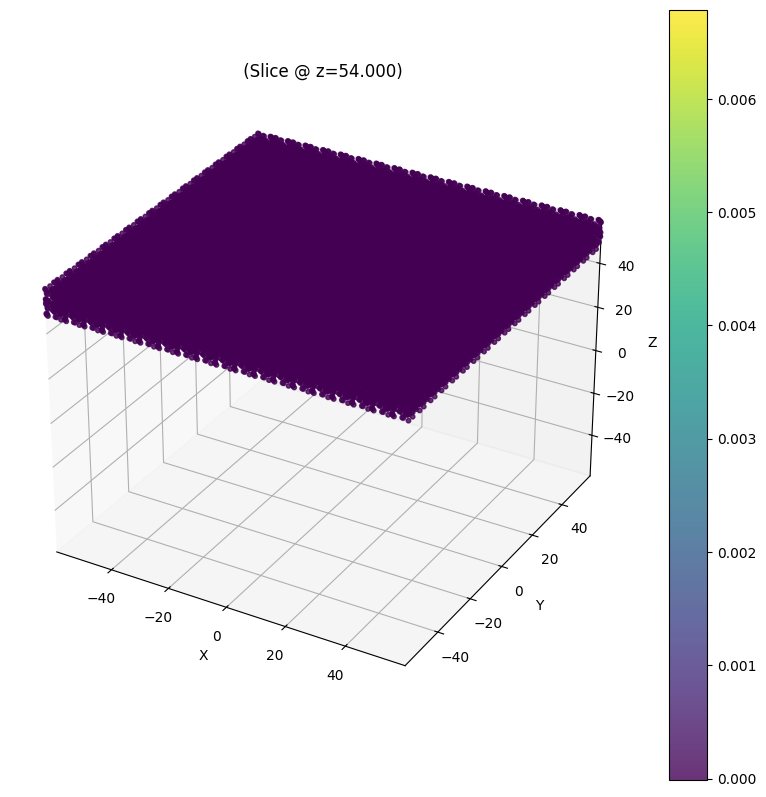

In [9]:
femsystem.plot_n_slices_interior(u_even_interior,n_slices=10)

# Plot the Geometry

V min to max: 0.0 1.0


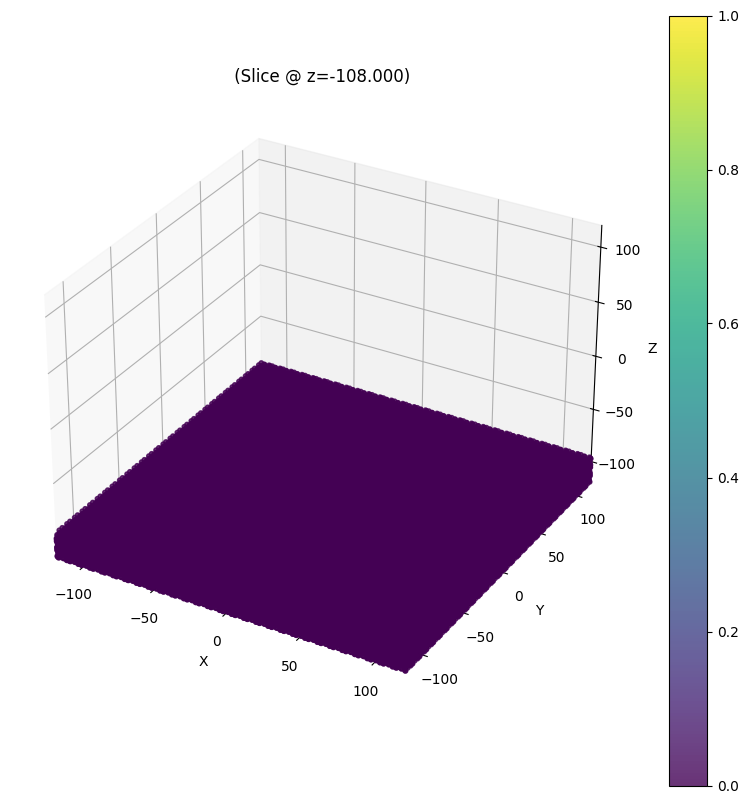

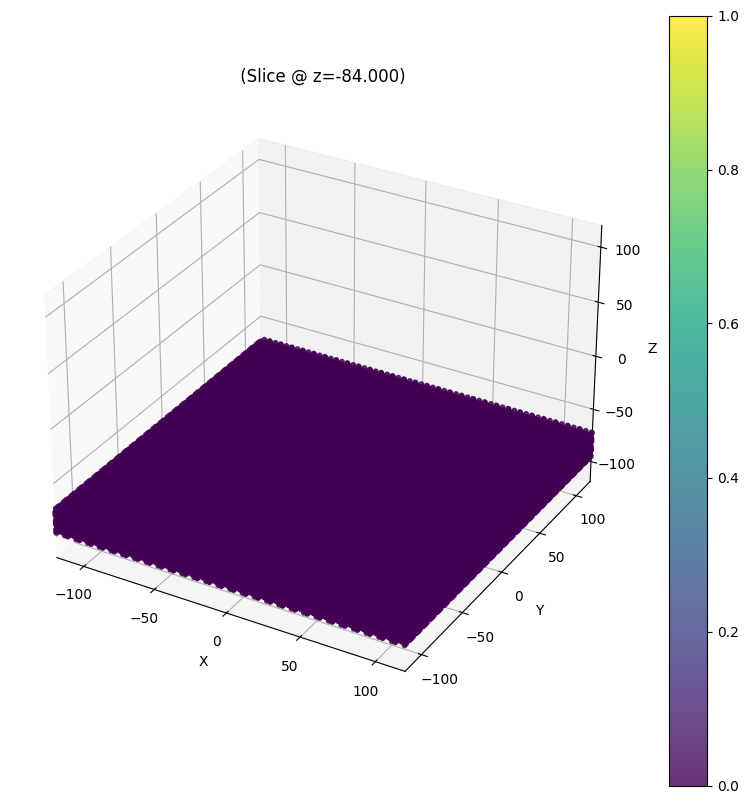

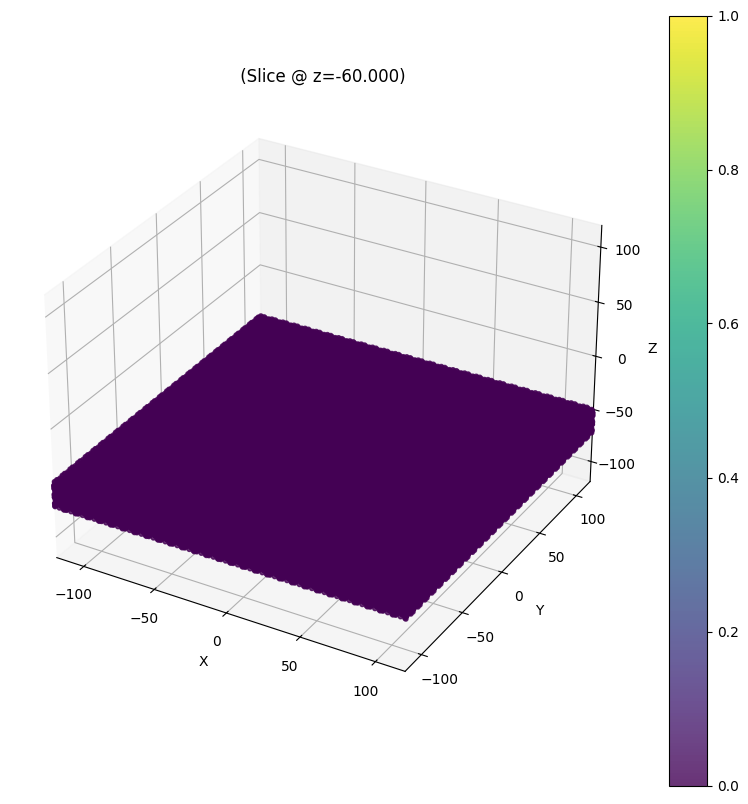

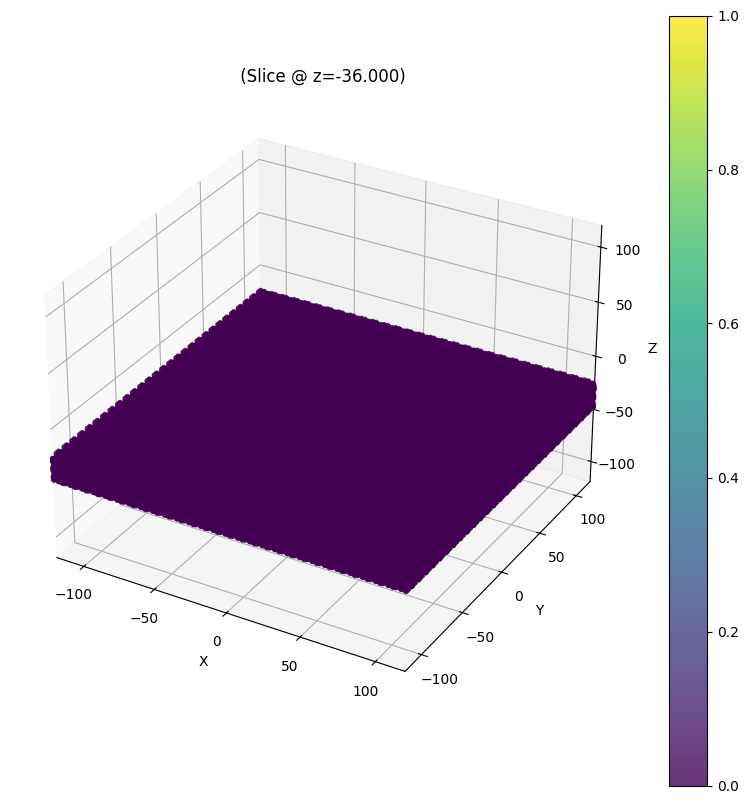

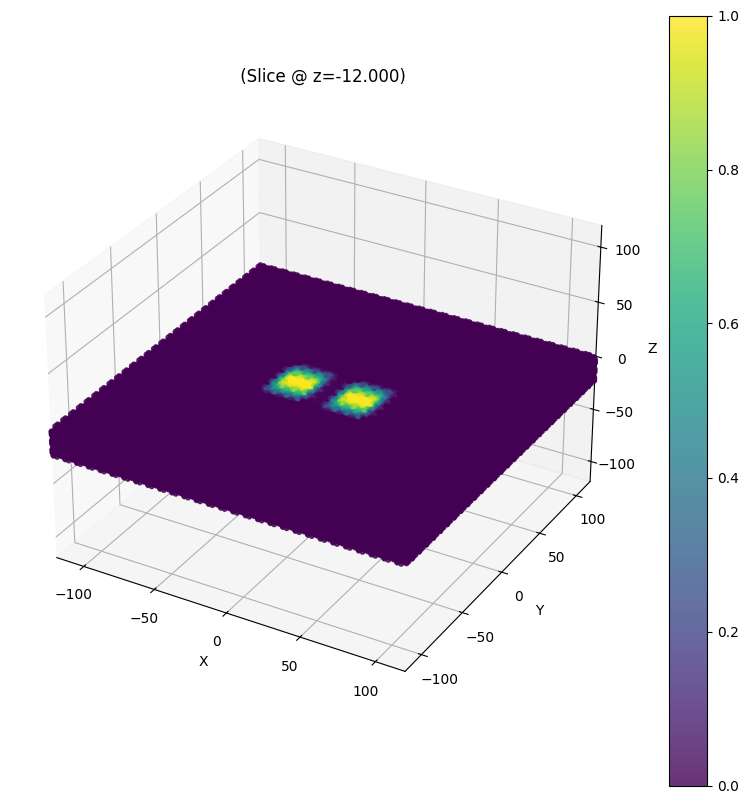

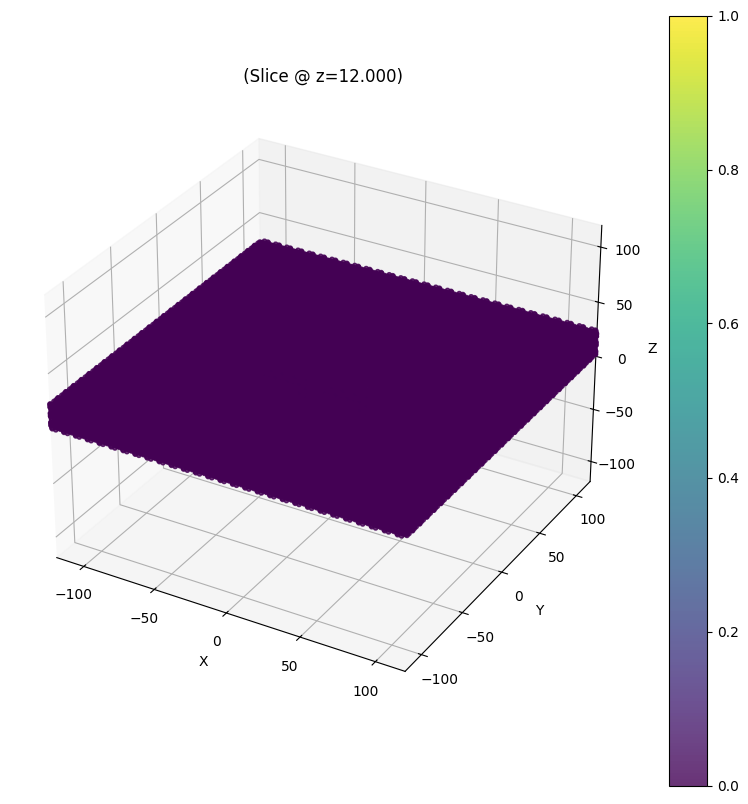

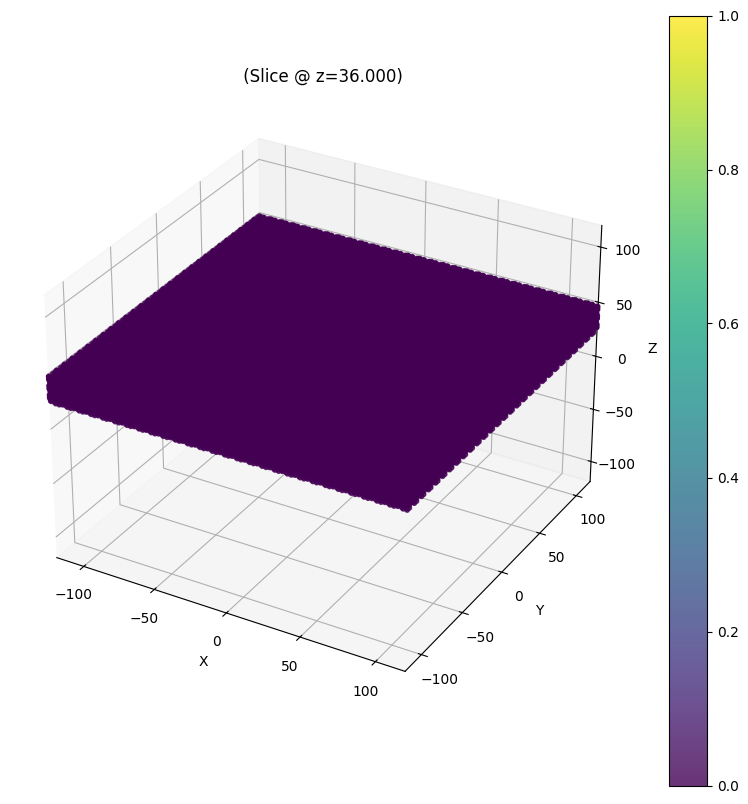

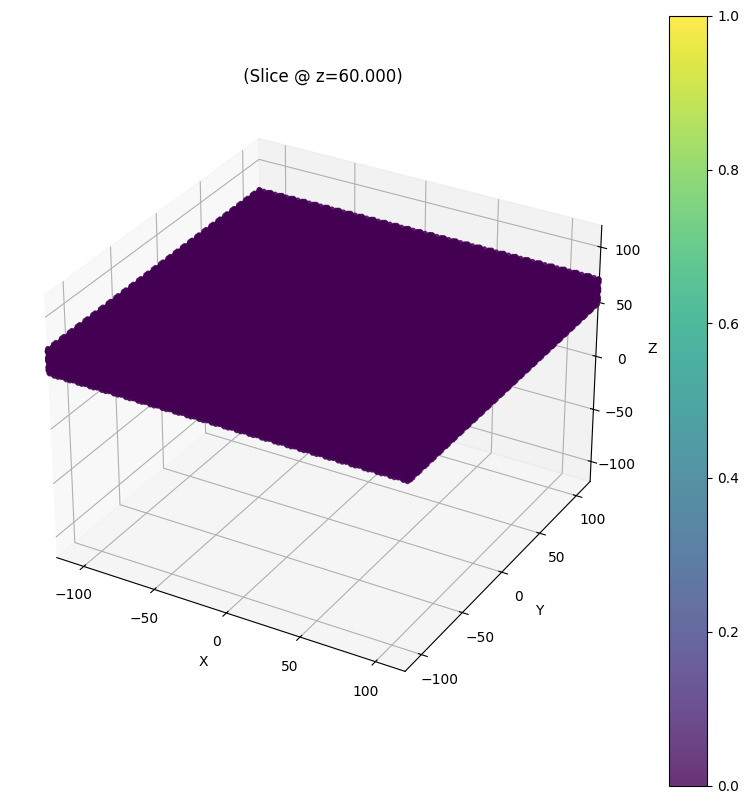

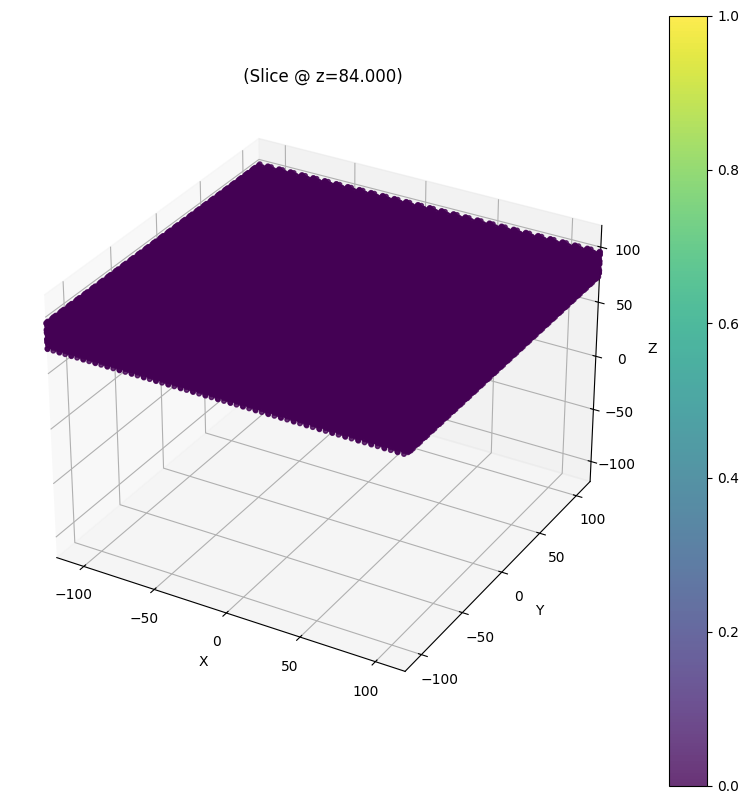

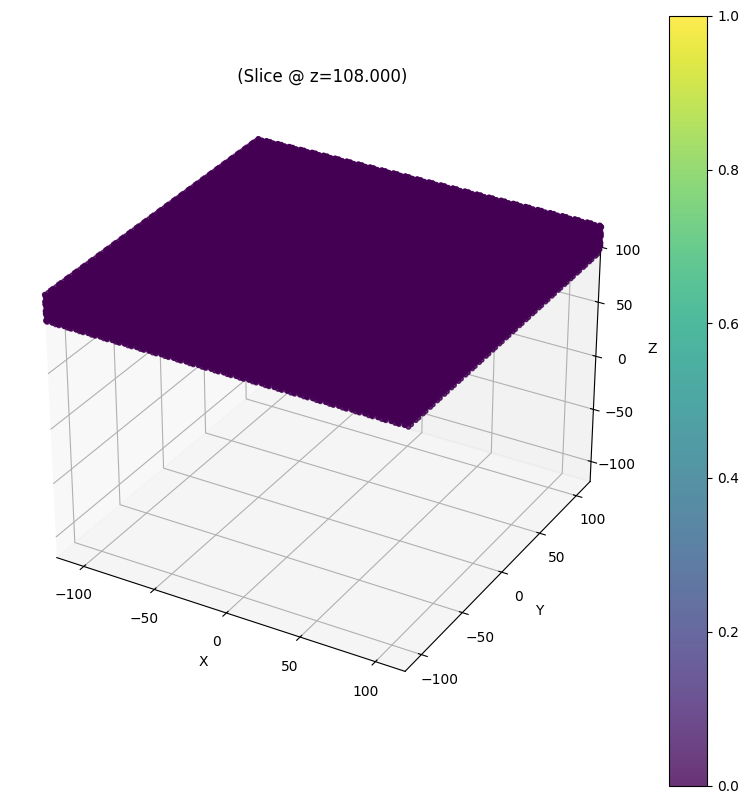

: 

In [ ]:
femsystem.plot_n_slices_interior(theta_at_interior,n_slices=10)